In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\DAI\DAI\MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


In [5]:
df.shape

(63023, 13)

In [6]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [7]:
df_new = df.fillna({'Price': df['Price'].mode()[0]})

In [8]:
df_new.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

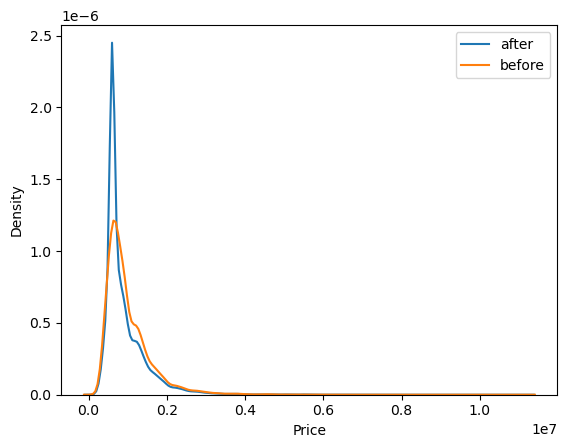

In [9]:
sns.kdeplot(df_new['Price'],label='after')
sns.kdeplot(df['Price'],label='before')
plt.legend()

by filling the missing values using mode does not change the distributionm of price column.

In [11]:
def unique(df,col):
  print(col,(df[col].nunique()))

In [12]:
for i in df.columns:
  unique(df,i)

Suburb 380
Address 57754
Rooms 14
Type 3
Price 3417
Method 9
SellerG 476
Date 112
Postcode 225
Regionname 8
Propertycount 368
Distance 180
CouncilArea 34


**UNIVARIATYE ANALYSIS**

In [14]:
def univariate(df,col):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.kdeplot(df[col])

Text(0, 0.5, 'Count')

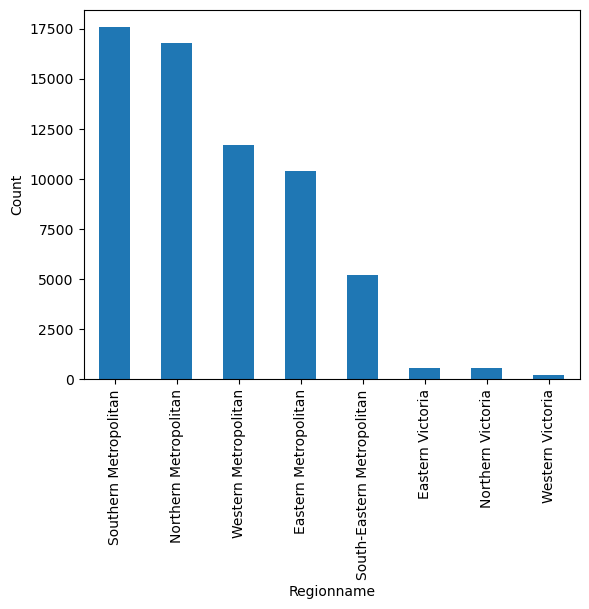

In [15]:
df['Regionname'].value_counts().plot(kind='bar')
plt.xlabel('Regionname')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

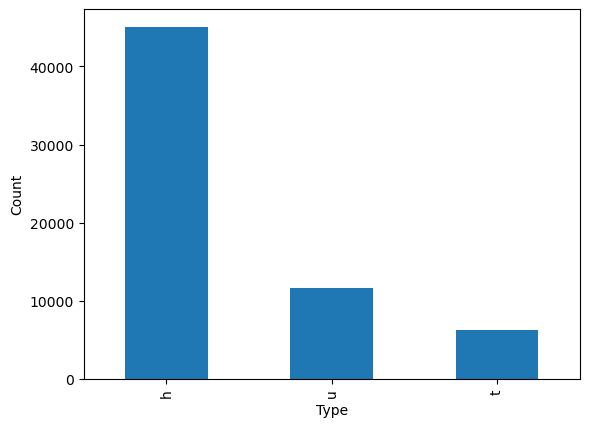

In [16]:
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

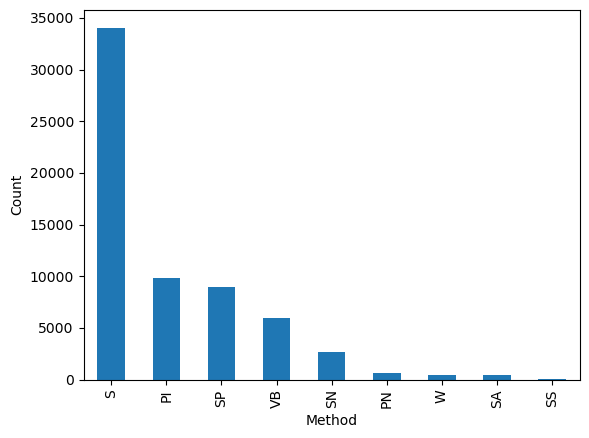

In [17]:
df['Method'].value_counts().plot(kind='bar')
plt.xlabel('Method')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

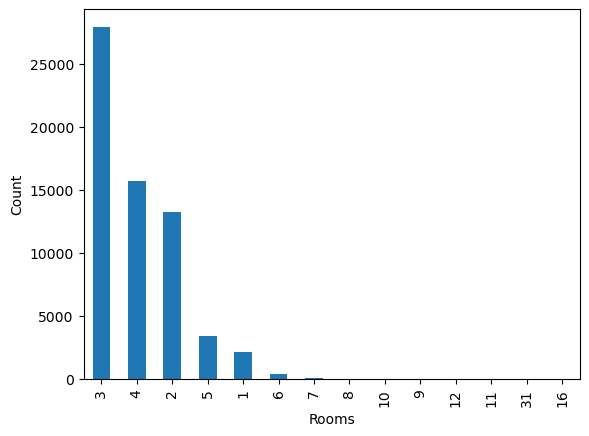

In [18]:
df['Rooms'].value_counts().plot(kind='bar')
plt.xlabel('Rooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

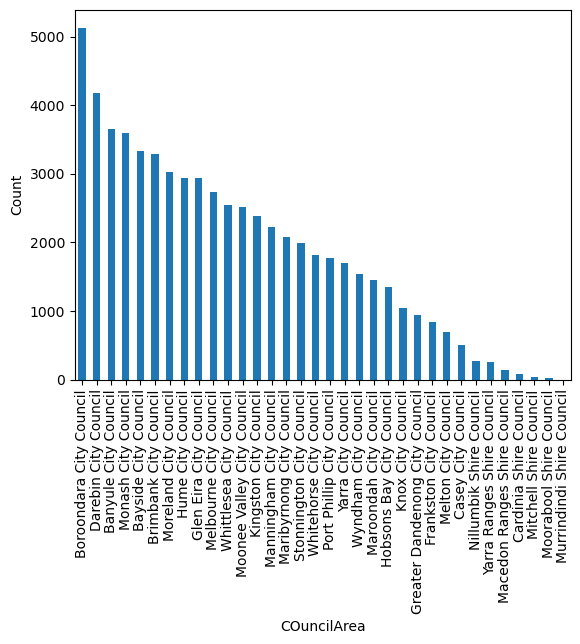

In [19]:
df['CouncilArea'].value_counts().plot(kind='bar')
plt.xlabel('COuncilArea')
plt.ylabel('Count')

MULTIVARIATE ANALYSIS


<Axes: xlabel='Price', ylabel='Density'>

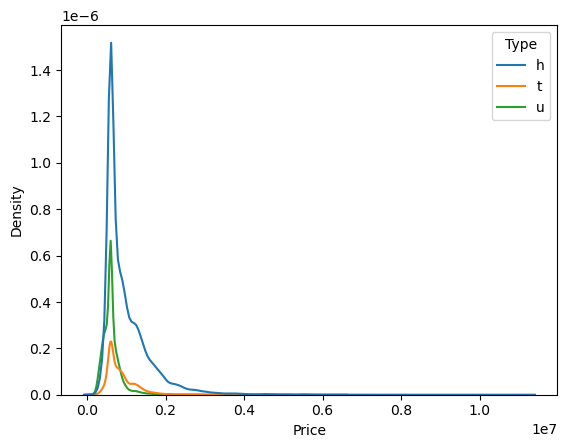

In [21]:
sns.kdeplot(x='Price',hue='Type',data=df_new,color='dark')

<Axes: >

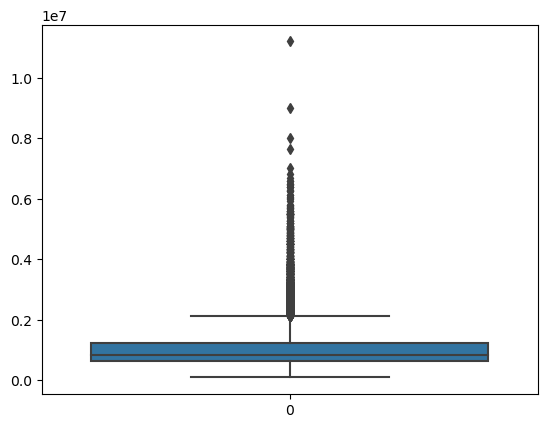

In [22]:
sns.boxplot(df['Price'])

In [23]:
Q1=df_new['Price'].quantile(0.25)
Q2=df_new['Price'].quantile(0.50)
Q3=df_new['Price'].quantile(0.75)
lower_bound=Q1-1.5*(Q3-Q1)
upper_bound=Q3+1.5*(Q3-Q1)
df_filtered=df_new[(df_new['Price']>=lower_bound) & (df_new['Price']<=upper_bound)]
df_filtered

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,600000.0,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council


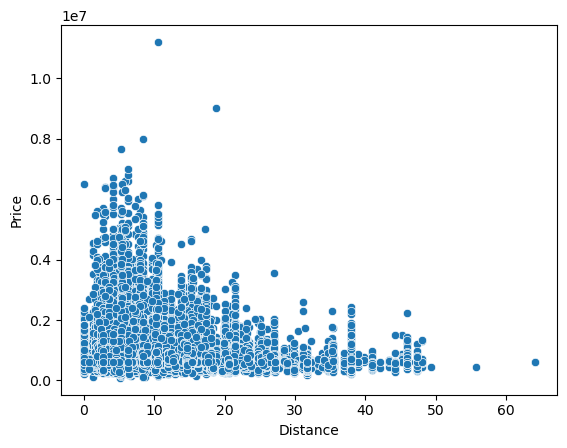

In [24]:
sns.scatterplot(x='Distance', y='Price', data=df_new)
plt.show()

<Axes: xlabel='Distance', ylabel='Price'>

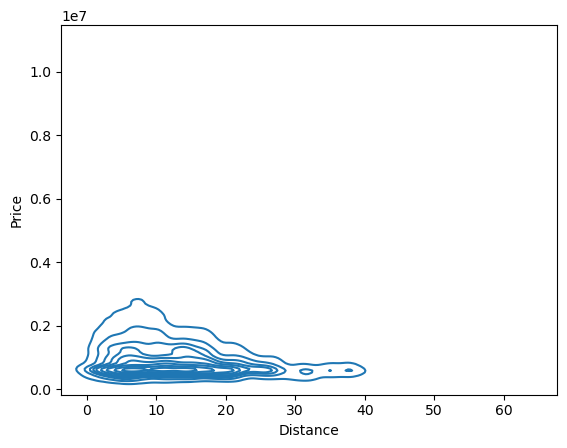

In [25]:
sns.kdeplot(x='Distance', y='Price', data=df_new)

<Axes: xlabel='Rooms', ylabel='Price'>

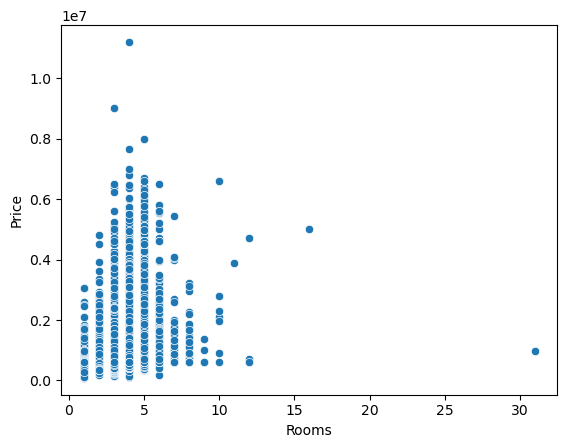

In [26]:
sns.scatterplot(x='Rooms', y='Price',data=df_new)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'South-Eastern Metropolitan'),
  Text(4, 0, 'Eastern Metropolitan'),
  Text(5, 0, 'Northern Victoria'),
  Text(6, 0, 'Western Victoria'),
  Text(7, 0, 'Eastern Victoria')])

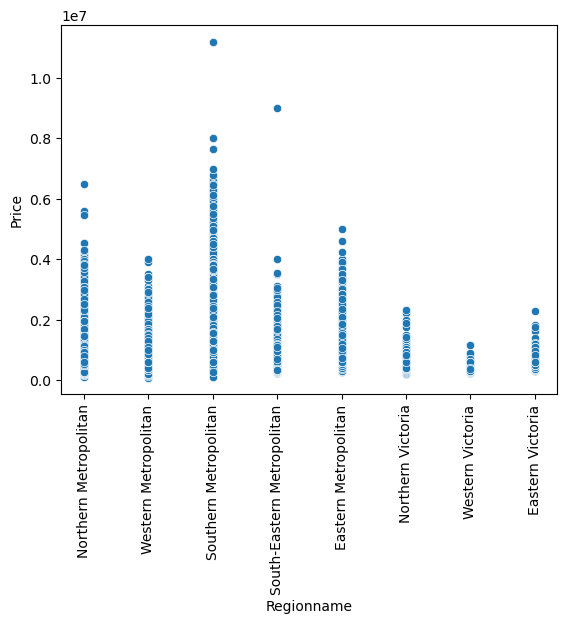

In [27]:
sns.scatterplot(x='Regionname', y='Price',data=df_new)
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'Yarra City Council'),
  Text(1, 0, 'Moonee Valley City Council'),
  Text(2, 0, 'Brimbank City Council'),
  Text(3, 0, 'Port Phillip City Council'),
  Text(4, 0, 'Darebin City Council'),
  Text(5, 0, 'Hobsons Bay City Council'),
  Text(6, 0, 'Stonnington City Council'),
  Text(7, 0, 'Boroondara City Council'),
  Text(8, 0, 'Monash City Council'),
  Text(9, 0, 'Kingston City Council'),
  Text(10, 0, 'Hume City Council'),
  Text(11, 0, 'Maroondah City Council'),
  Text(12, 0, 'Bayside City Council'),
  Text(13, 0, 'Banyule City Council'),
  Text(14, 0, 'Glen Eira City Council'),
  Text(15, 0, 'Whitehorse City Council'),
  Text(16, 0, 'Knox City Council'),
  Text(17, 0, 'Maribyrnong City Council'),
  Text(18, 0, 'Moreland City Council'),
  Text(19, 0, 'Manningham City Council'),
  Tex

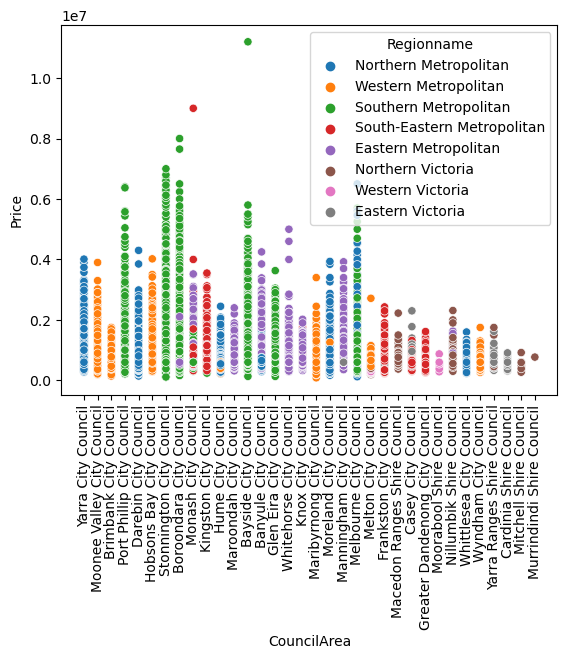

In [28]:
sns.scatterplot(x='CouncilArea', y='Price',data=df_new,hue='Regionname')
plt.xticks(rotation=90)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [30]:
df_new['zscore_price'] = stats.zscore(df_new['Price'])

In [31]:
df_new.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,zscore_price
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,1.068665
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.574773
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,0.940619
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,1.114395
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,-0.431302


In [32]:
Q1 = df_new['Price'].quantile(0.25)
Q3 = df_new['Price'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

In [33]:
print(f"Interquartile Range (IQR) for Price: {IQR}")

Interquartile Range (IQR) for Price: 465000.0


In [34]:
price_bins = [0, 500000, 1000000, 1500000, np.inf]  # Example bins
price_labels = ['Low', 'Medium', 'High', 'Very High']
df_new['Price_Category'] = pd.cut(df_new['Price'], bins=price_bins, labels=price_labels)

# Step 2: Create a frequency table (observed frequencies)
observed_frequencies = df_new['Price_Category'].value_counts().sort_index()

# Example: Let's assume some expected frequencies for demonstration (should be based on hypothesis)
expected_frequencies = [50, 50, 50, 50]  # Replace with meaningful values

# Step 3: Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency([observed_frequencies, expected_frequencies])

# Step 4: Show the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: {expected}")

Chi-Square Statistic: 146.65713619888456
P-value: 1.386215505216889e-31
Degrees of Freedom: 3
Expected Frequencies: [[5.81056051e+03 3.98993815e+04 1.05216103e+04 6.79144772e+03]
 [1.84394920e+01 1.26618477e+02 3.33897474e+01 2.15522832e+01]]
